**Import the requierd python libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
np.random.seed(0)

In [2]:
#To displays all columns and rows uncomment below
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('datasetPort80_1.csv')
df.head()  #shows the first five rows
#df

,Time,Source,Destination,Protocol,Length,TotalLength,SourcePort,DestinationPort,DestinationMacAddress,SourceMacAddress,PacketClassification
0,0.000000,192.168.1.93,151.101.62.133,TCP,78,64,49945,80,78:65:59:a4:64:39,c4:b3:01:d8:fb:ff,normal
1,0.000082,192.168.1.93,151.101.62.133,TCP,78,64,49946,80,78:65:59:a4:64:39,c4:b3:01:d8:fb:ff,normal
2,0.008606,151.101.62.133,192.168.1.93,TCP,74,60,80,49945,c4:b3:01:d8:fb:ff,78:65:59:a4:64:39,normal
3,0.008665,192.168.1.93,151.101.62.133,TCP,66,52,49945,80,78:65:59:a4:64:39,c4:b3:01:d8:fb:ff,normal
4,0.009778,151.101.62.133,192.168.1.93,TCP,74,60,80,49946,c4:b3:01:d8:fb:ff,78:65:59:a4:64:39,normal


**Exploratory Data Analysis(EDA)**

 Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   5270 non-null   float64
 1   Source                 5270 non-null   object 
 2   Destination            5270 non-null   object 
 3   Protocol               5270 non-null   object 
 4   Length                 5270 non-null   int64  
 5   TotalLength            5270 non-null   int64  
 6   SourcePort             5270 non-null   int64  
 7   DestinationPort        5270 non-null   int64  
 8   DestinationMacAddress  5270 non-null   object 
 9   SourceMacAddress       5270 non-null   object 
 10  PacketClassification   5270 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 453.0+ KB


In [5]:
df.shape

(5270, 11)

In [6]:
#Description of dataset
df.describe()

,Time,Length,TotalLength,SourcePort,DestinationPort
count,5270.000000,5270.000000,5270.000000,5270.000000,5270.000000
mean,129.455204,88.151803,74.135863,35562.160911,23378.671347
std,100.753354,140.430960,140.434496,29152.891890,28745.065574
min,0.000000,54.000000,40.000000,80.000000,80.000000
25%,77.840096,54.000000,40.000000,80.000000,80.000000
50%,81.400849,66.000000,52.000000,50474.000000,80.000000
75%,82.917188,66.000000,52.000000,61489.000000,61315.750000
max,539.545821,1506.000000,1492.000000,61754.000000,61754.000000


#**Checking Missing value**

We will now check for missing values in our dataset.We will use the isnull(), that tells us how many missing values we have in each column in our dataset. The output (Pandas Series) should look like this:

In [7]:
df.isnull().sum()/len(df)

Time                     0.0
Source                   0.0
Destination              0.0
Protocol                 0.0
Length                   0.0
TotalLength              0.0
SourcePort               0.0
DestinationPort          0.0
DestinationMacAddress    0.0
SourceMacAddress         0.0
PacketClassification     0.0
dtype: float64

# **Plots**

## **1.   Plot of how many ddos request per second vs normal traffic per second(Time column)**

Text(0.5, 1.0, 'DDos request per second')

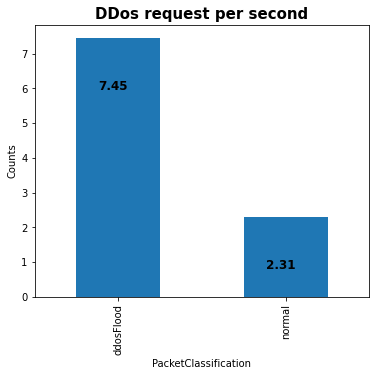

In [8]:
#Plots the number of reqests made by ddos and nromal traffic per second
temp = np.round((df.groupby('PacketClassification').size()/df.iloc[-1,0]),2)      # Getting the ddos request per second (Formula: # ddos/Total Time) and for normal request per second (# Normal/Total Time)
ax = temp.plot(kind='bar', stacked=True, figsize=[6, 5]) 
for index, data in enumerate(temp):
    ax.text(index-0.12, data-1.5, str(data), fontsize = 12, fontweight='bold')    # For putting text in the plot. str(data) converts numerical data to string
ax.set_ylabel('Counts')
ax.set_title('DDos request per second', fontsize=15, fontweight='bold')

## **2. Plot bar chart of ip address for source**

Text(0.5, 1.0, 'Counts of IP Address of Source')

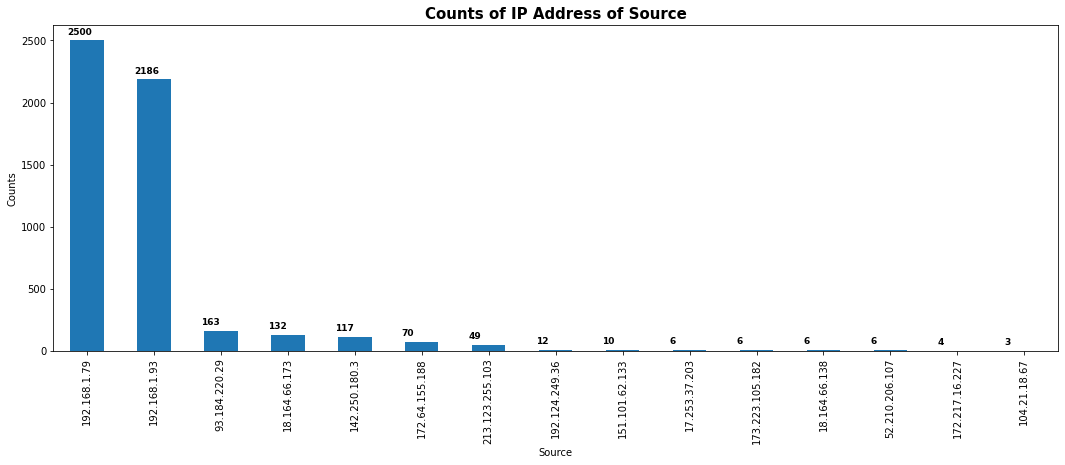

In [9]:
#get the count of how many times an IP-address appears in the source column
temp = df.groupby('Source').size().sort_values(ascending=False)   # Getting the counts of Source IP and sorting into descending order
ax = temp.plot(kind='bar', stacked=True, figsize=[18, 6]) 
for index, data in enumerate(temp):
    ax.text(index-0.30, data+50, str(data), fontsize = 9, fontweight='bold')    # For text in the plot
ax.set_ylabel('Counts')
ax.set_title('Counts of IP Address of Source', fontsize=15, fontweight='bold')

## **3. Plot bar chart of ip address for destination**

Text(0.5, 1.0, 'Counts of IP Address of Destination')

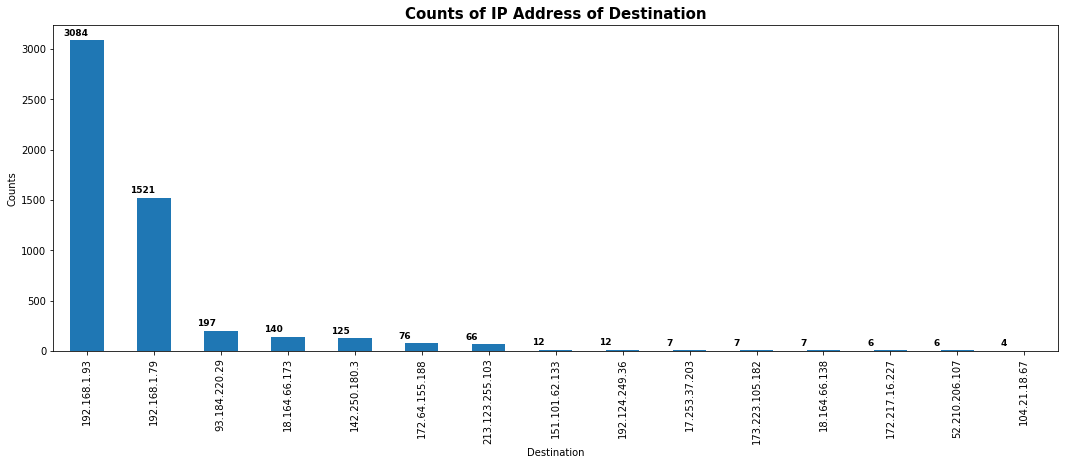

In [10]:
temp = df.groupby('Destination').size().sort_values(ascending=False)   # Getting the counts of destination IP and sorting in descending order
ax = temp.plot(kind='bar', stacked=True, figsize=[18, 6]) 
for index, data in enumerate(temp):
    ax.text(index-0.35, data+50, str(data), fontsize = 9, fontweight='bold')    # For text in the plot
ax.set_ylabel('Counts')
ax.set_title('Counts of IP Address of Destination', fontsize=15, fontweight='bold')

## **4. Plot of protocol used by ddos vs normal**

In [11]:
#Protocol breakdown based on AttackTyoe/PacketClassification
pd.crosstab(df["Protocol"],df["PacketClassification"])

PacketClassification,ddosFlood,normal
Protocol,,
HTTP,0,4
OCSP,0,201
TCP,4021,1044


Text(0.5, 1.0, 'Protocols used by Normal vs DDos')

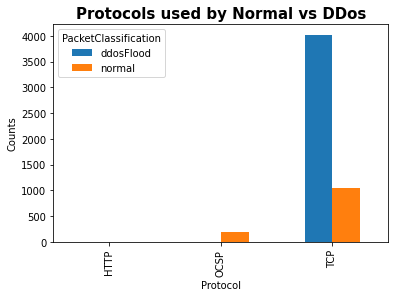

In [12]:
# Generating the dataframe with Protocol counts Packet classification wise.
pd.crosstab(df["Protocol"].astype(str),df["PacketClassification"]).plot.bar()
plt.ylabel('Counts')
plt.title('Protocols used by Normal vs DDos', fontsize=15, fontweight='bold')

## **5. Plot of source and destination ports used by ddos attack**

In [13]:
#create new df Source which counts unique Source port numbers used by ddos request
Source = df[df['PacketClassification'] == 'ddosFlood'].groupby('SourcePort').size().sort_values(ascending=False).to_frame().T
#print(Source)
Source['Others'] = Source.iloc[:, 1:].sum(axis=1)  #sums the value in all columns after 1st column(i.e., port80)
Source['Others']
s = Source[[80,'Others']]
print(s)

SourcePort    80  Others
0           1521    2500


In [14]:
#create new df Dest which counts unique destination port numbers used by ddos request
Dest = df[df['PacketClassification'] == 'ddosFlood'].groupby('DestinationPort').size().sort_values(ascending=False).to_frame().T
Dest['Others'] = Dest.iloc[:, 1:].sum(axis=1)   #sums the value in all columns after 1st column(i.e., port80)
d  = Dest[[80,'Others']]
print(d)

DestinationPort    80  Others
0                2500    1521


In [15]:
#merge the results from s and d into one table/dataframe
merged = s.append(d)
merged['Tag'] = ['Source','Destination']   #create row headers/titles
merged = merged.set_index('Tag')
merged

,80,Others
Tag,,
Source,1521,2500
Destination,2500,1521


Text(0.5, 1.0, 'Source and Destination ports used by ddos attack')

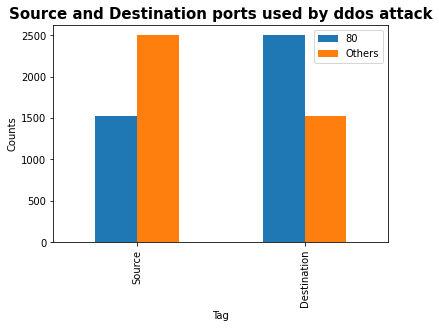

In [16]:
#Plot
merged.plot.bar()
plt.ylabel('Counts')
plt.title('Source and Destination ports used by ddos attack', fontsize=15, fontweight='bold')

# **Some Utility Functions**

In [17]:
def preprocessing(df):
    '''
    Function for preprocessing of the data
    Takes dataframe as input
    Does following preprocessing,
    1) drops time column
    2) Does One hot encoding of Categorical columns
    3) Does Label encoding of Target Variable
    4) Standardize the data
    
    Return final dataframe 
    '''
    df = df.drop(columns=['Time'])

    for col in ['Source', 'Destination', 'Protocol', 'DestinationMacAddress', 'SourceMacAddress']:
        # Get dummies of the column and right merge into the original dataframe
        df = pd.merge(left=df,
                    right=pd.get_dummies(df[col], prefix=col, prefix_sep='_'),
                    left_index=True,
                    right_index=True
        )
        df = df.drop(columns = [col])
    
    # Replacing Normal with 0 and ddosFlood with 1
    df = df.replace({'PacketClassification':{'normal':0,'ddosFlood':1}})

    # Scaling only specific columns
    col = ['Length', 'TotalLength',	'SourcePort', 'DestinationPort']
    scaler = StandardScaler()
    X = scaler.fit_transform(df[col])
    df[col] = X

    return df


def plot_confusion_matrix(conf_mat):        
    '''
    Function for Plotting the confusion matrix
    Takes raw confusion matrix as input
    '''
    classes = ["Normal","DdosFlood"]        # Our Two classes 
    df_cm = pd.DataFrame(conf_mat,classes,classes)  # Make dataframe of the confusion matrix
    data = df_cm.values.astype(str)         # Converting values to string
    plt.figure(figsize=(5,4))
    sns.set(font_scale=1.4)                 # Setting fontsize
    sns.heatmap(df_cm, annot=data, fmt = '', annot_kws={"size": 16})    # Generating heatmap
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def report(x,y):   
    '''
    Function for priniting the classification report
    Takes actual: x and predicted label: y as input
    computes accuracy, classification report, confusion matrix, true positive rate, and false positive rate
    '''                        
    acc = accuracy_score(x,y)
    cr = classification_report(x,y,zero_division=0)

    # TP: True Positive,    TN: True Negative
    # FP: False Positive,   FN: False Negative  
    TP = TN = FP = FN = 0
    for i in range(len(x)):
        if x[i] == 1 and y[i] == 1: # If true label is 1 and predicted label is also 1
            TP += 1
        elif x[i] == 0 and y[i] == 0:   # If true label is 0 and predicted label is also 0
            TN += 1
        elif x[i] == 0 and y[i] == 1:   # If true label is 0 and predicted label is also 1
            FP += 1
        else:                           # If true label is 1 and predicted label is also 0
            FN += 1

    true_positive_rate = TP/(TP+FN)     # Computes true positive rate
    false_positive_rate = FP/(FP+TN)    # Computes false positive rate
    print("Accuracy: ", acc)
    print(f'\nTrue Positive Rate: {round(true_positive_rate,2)}')
    print(f'False Positive Rate: {round(false_positive_rate,2)}')
    print("\nClassification Report:\n", cr)
    
    cm = confusion_matrix(x,y,labels=[0, 1])
    plot_confusion_matrix(cm)


def message(clf,data):
    '''
    Function for printing the message when DDos attack is detected
    '''
    # Loop through all data
    for i in range(len(data)): 
        #   Predict data                                                 
        pred = clf.predict(data.iloc[i].values.reshape(1,-1))                  
        # If DDos detected
        if pred == 1:
            # Get all columns whose names start with Source_                                                           
            filter_col = [col for col in data if col.startswith('Source_')]     
            
            # Get column name which has 1 as data
            h = data[filter_col].iloc[i].isin([1]) 

            # Find the ip address and remove Source_ from that                             
            ip = str(h[h].index.values[0]).replace('Source_','')   

            # Display message             
            print(f'DDOs attack detected!\t\tSample Number: {i}\tSource IP: {ip}')      

In [18]:
df = preprocessing(df)      # Preprocessing data

In [19]:
pd.set_option('display.max_columns', None)  #shows all 44 columns
df.head()

,Length,TotalLength,SourcePort,DestinationPort,PacketClassification,Source_104.21.18.67,Source_142.250.180.3,Source_151.101.62.133,Source_17.253.37.203,Source_172.217.16.227,Source_172.64.155.188,Source_173.223.105.182,Source_18.164.66.138,Source_18.164.66.173,Source_192.124.249.36,Source_192.168.1.79,Source_192.168.1.93,Source_213.123.255.103,Source_52.210.206.107,Source_93.184.220.29,Destination_104.21.18.67,Destination_142.250.180.3,Destination_151.101.62.133,Destination_17.253.37.203,Destination_172.217.16.227,Destination_172.64.155.188,Destination_173.223.105.182,Destination_18.164.66.138,Destination_18.164.66.173,Destination_192.124.249.36,Destination_192.168.1.79,Destination_192.168.1.93,Destination_213.123.255.103,Destination_52.210.206.107,Destination_93.184.220.29,Protocol_HTTP,Protocol_OCSP,Protocol_TCP,DestinationMacAddress_78:65:59:a4:64:39,DestinationMacAddress_b4:2e:99:d0:fa:1a,DestinationMacAddress_c4:b3:01:d8:fb:ff,SourceMacAddress_78:65:59:a4:64:39,SourceMacAddress_b4:2e:99:d0:fa:1a,SourceMacAddress_c4:b3:01:d8:fb:ff
0,-0.072297,-0.072182,0.493406,-0.810605,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,-0.072297,-0.072182,0.493440,-0.810605,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,-0.100784,-0.100668,-1.217222,0.924293,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
3,-0.157757,-0.157639,0.493406,-0.810605,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4,-0.100784,-0.100668,-1.217222,0.924327,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


In [20]:
df.shape        # Shape after preprocessing

(5270, 44)

In [21]:
x = df.drop(columns=['PacketClassification'])       # Features
y = df['PacketClassification'].values               # Labels

In [22]:
#Test Train split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)  # Train-Test Split

print((X_train.shape, y_train.shape))
print((X_test.shape, y_test.shape))

((4216, 43), (4216,))
((1054, 43), (1054,))


**k-Nearest Neighbors ML model (kNN)**

In [23]:
model = KNeighborsClassifier()    # Classifier

# Hyperparameters to Tune
parameter_space = {
    'n_neighbors': np.arange(1,21)
}

# Hyperparameter Tunning
clf = GridSearchCV(model, parameter_space, cv = 5, scoring = "accuracy", verbose = True) # model
clf.fit(X_train.values,y_train)
print(f'Best Parameters: {clf.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 1}


In [24]:
#call message function to print if ddos is detected
message(clf,X_test)

DDOs attack detected!		Sample Number: 0	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 2	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 3	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 5	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 6	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 7	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 9	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 10	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 11	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 12	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 13	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 14	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 15	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 17	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 18	Source IP: 192.168.1.93
DDOs attack detected!		Sample Nu

DDOs attack detected!		Sample Number: 170	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 171	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 172	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 173	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 174	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 175	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 177	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 178	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 179	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 180	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 182	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 184	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 185	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 187	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 189	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 365	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 367	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 368	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 369	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 370	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 372	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 374	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 375	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 376	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 377	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 380	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 382	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 383	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 384	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 385	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 554	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 555	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 558	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 560	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 561	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 563	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 564	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 565	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 566	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 567	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 568	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 569	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 570	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 571	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 572	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 749	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 750	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 751	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 752	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 753	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 754	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 756	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 757	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 758	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 759	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 763	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 765	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 766	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 767	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 768	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 940	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 941	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 942	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 943	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 944	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 947	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 948	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 949	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 951	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 953	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 954	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 955	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 956	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 957	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 958	Source IP: 192.168.1.93
DDOs attac

In [25]:
#Make predictions useing the trained datasets
train_pred = clf.predict(X_train.values)   # Train predict
test_pred = clf.predict(X_test.values)     # Test predict

		Train output:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       997
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      4216
   macro avg       1.00      1.00      1.00      4216
weighted avg       1.00      1.00      1.00      4216



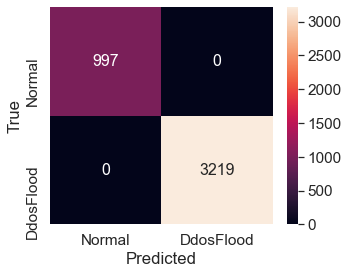

In [26]:
print("\t\tTrain output:\n")
report(y_train,train_pred)

		Test output:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1054
   macro avg       1.00      1.00      1.00      1054
weighted avg       1.00      1.00      1.00      1054



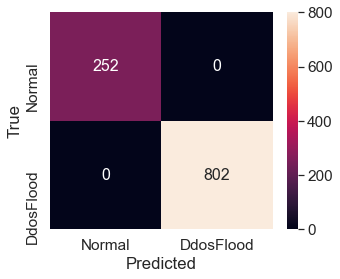

In [27]:
print("\t\tTest output:\n")
report(y_test,test_pred)

**Logistic Regression ML model (LR)**

In [28]:
#logistic regression model form the sklearn lib
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clfLR = lr.fit(X_train, y_train)
clfLR.fit(X_train.values,y_train)

LogisticRegression()

In [29]:
#call message function to print if ddos is detected
message(clfLR,X_test)

DDOs attack detected!		Sample Number: 0	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 2	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 3	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 5	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 6	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 7	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 9	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 10	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 11	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 12	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 13	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 14	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 15	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 17	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 18	Source IP: 192.168.1.93
DDOs attack detected!		Sample Nu

DDOs attack detected!		Sample Number: 337	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 338	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 339	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 341	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 342	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 343	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 344	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 348	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 349	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 350	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 351	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 352	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 353	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 356	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 357	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 505	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 506	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 507	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 508	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 509	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 510	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 512	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 514	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 515	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 516	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 517	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 518	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 520	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 522	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 523	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 686	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 689	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 690	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 691	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 692	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 693	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 694	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 695	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 696	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 697	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 698	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 700	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 702	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 704	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 705	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 859	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 860	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 861	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 862	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 863	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 864	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 866	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 868	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 872	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 873	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 874	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 875	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 876	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 877	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 880	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 1026	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1027	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1028	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1029	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1030	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1033	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1035	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1038	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1039	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1040	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1041	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1042	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1043	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1044	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1045	Source IP: 192.168.

In [30]:
#Make predictions useing the trained datasets
train_pred_lr = clfLR.predict(X_train.values)   # Train predict
test_pred_lr = clfLR.predict(X_test.values)     # Test predict

		Train output for Linear regression model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       997
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      4216
   macro avg       1.00      1.00      1.00      4216
weighted avg       1.00      1.00      1.00      4216



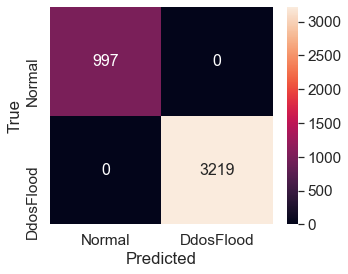

In [31]:
print("\t\tTrain output for Linear regression model:\n")
report(y_train,train_pred_lr)

		Train output for Linear regression model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1054
   macro avg       1.00      1.00      1.00      1054
weighted avg       1.00      1.00      1.00      1054



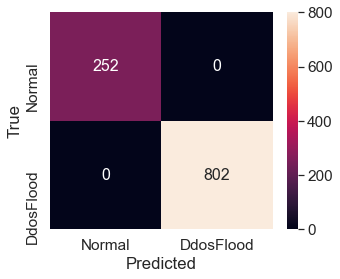

In [32]:
print("\t\tTrain output for Linear regression model:\n")
report(y_test,test_pred_lr)

**Random Forest Classifier (RFC)**

In [33]:
#import the RFC from the Sklearn 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
clfRFC = rfc.fit(X_train, y_train)
clfRFC.fit(X_train.values,y_train)

RandomForestClassifier()

In [34]:
#call message function to print if ddos is detected
message(clfRFC,X_test)

DDOs attack detected!		Sample Number: 0	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 2	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 3	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 5	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 6	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 7	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 9	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 10	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 11	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 12	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 13	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 14	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 15	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 17	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 18	Source IP: 192.168.1.93
DDOs attack detected!		Sample Nu

DDOs attack detected!		Sample Number: 180	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 182	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 184	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 185	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 187	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 189	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 190	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 191	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 193	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 194	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 195	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 196	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 197	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 199	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 200	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 357	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 359	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 361	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 362	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 363	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 364	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 365	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 367	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 368	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 369	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 370	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 372	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 374	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 375	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 376	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 515	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 516	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 517	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 518	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 520	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 522	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 523	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 524	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 525	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 528	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 529	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 530	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 531	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 532	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 533	Source IP: 192.168.1.79
DDOs attac

DDOs attack detected!		Sample Number: 691	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 692	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 693	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 694	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 695	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 696	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 697	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 698	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 700	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 702	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 704	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 705	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 706	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 707	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 708	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 864	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 866	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 868	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 872	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 873	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 874	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 875	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 876	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 877	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 880	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 881	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 882	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 883	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 884	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 885	Source IP: 192.168.1.93
DDOs attac

DDOs attack detected!		Sample Number: 1035	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1038	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1039	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1040	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1041	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1042	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1043	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1044	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1045	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1046	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1047	Source IP: 192.168.1.93
DDOs attack detected!		Sample Number: 1050	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1051	Source IP: 192.168.1.79
DDOs attack detected!		Sample Number: 1052	Source IP: 192.168.1.79


In [35]:
#Make predictions useing the trained datasets
train_pred_rfc = clfRFC.predict(X_train.values)   # Train predict
test_pred_rfc = clfRFC.predict(X_test.values)     # Test predict

		Train output for Random Forest Classifier model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       997
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      4216
   macro avg       1.00      1.00      1.00      4216
weighted avg       1.00      1.00      1.00      4216



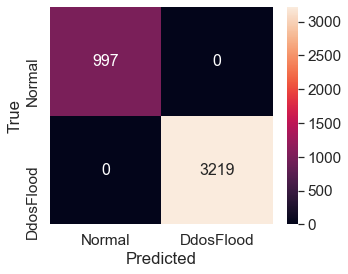

In [36]:
print("\t\tTrain output for Random Forest Classifier model:\n")
report(y_train,train_pred_rfc)

		Train output for Random Forest Classifier model:

Accuracy:  1.0

True Positive Rate: 1.0
False Positive Rate: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1054
   macro avg       1.00      1.00      1.00      1054
weighted avg       1.00      1.00      1.00      1054



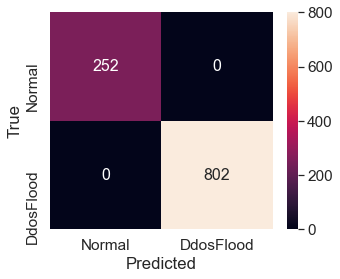

In [37]:
print("\t\tTrain output for Random Forest Classifier model:\n")
report(y_test,test_pred_rfc)

**Accuracy Ploting**

In [38]:
#Accuracies of the algorithm we implement above
accuracies=[['kNN',100],['LR',100],['RFC',100]]
scores=pd.DataFrame(accuracies,columns=['model','accuracy'])  #Stores the accuracy score of each model to a df called score

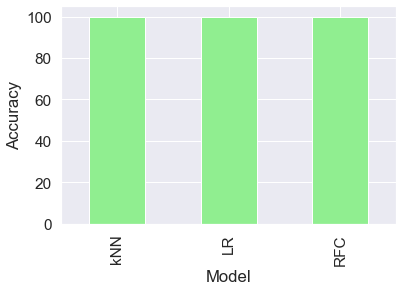

In [39]:
#accuracy ploted
scores.set_index('model').accuracy.plot(kind='bar',color='lightGreen')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()